## Project Description

Zillow is a real estate company that helps people find properties for sale/rent across the world. I have been tasked with creating a program that can more accurately determine the value of a home before it is posted for sale. I will only be looking at the properties that had a transaction in the year of 2017.

## Goals
- to discover drivers of property value
- to develop a ML program that can estimate property value better than the baseline

In [1]:
from acquire import wrangle_zillow
from prepare import remove_outliers, x_y_split, rmse, train_val_test
import functions as f

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Acquire
- data gathered from the Zillow database in SQL Ace
- each row represents a property
- each column represents a feature of the property
- the data gathered from the database started at 55,502 rows and 7 columns

## Prepare

### Prepare Actions:

- Removed columns that did not contain useful information
- Removed null values
- Checked that column data types were appropriate
- Split data into train, validate and test (approx. 60/20/20), stratifying on 'tax_value'

## Data Dictionary

| Target Variable | Description |
|-----------------|-------------|
| tax_value | The total tax assessed value of the parcel |

| Feature | Description |
|---------|-------------|
| bed | Number of bedrooms in home |
| bath | Number of bathrooms in home including fractional bathrooms |
| sqft | Calculated total finished living area of the home |
| year | The year the principal residence was built |
| fips | Federal Information Processing Standard code |
| lot_sqft | Area of the lot in square feet |

In [2]:
# acquring and cleaning the data
zillow = wrangle_zillow()

# splitting the data into train, validate and test
train, val, test = train_val_test(zillow)

# taking a quick look at the data
train.head()

fips column ignored


,bed,bath,sqft,tax_value,year,fips,lot_sqft
50421,3.0,2.0,1999.0,247327.0,1959.0,6037.0,12175.0
51037,3.0,2.0,2238.0,79255.0,1959.0,6059.0,7300.0
47272,2.0,1.0,886.0,158202.0,1941.0,6037.0,6080.0
16353,2.0,1.0,808.0,354794.0,1943.0,6037.0,5336.0
30173,3.0,3.0,2202.0,446560.0,1971.0,6059.0,5040.0


## Is there a difference between the average value of properties across counties?

**Ho: FIPS code and property value are independent of each other.**  
**Ha: FIPS code and property value are related.**

- determine if the property value and fips code are related
- confidence interval of 95%
- alpha of .05

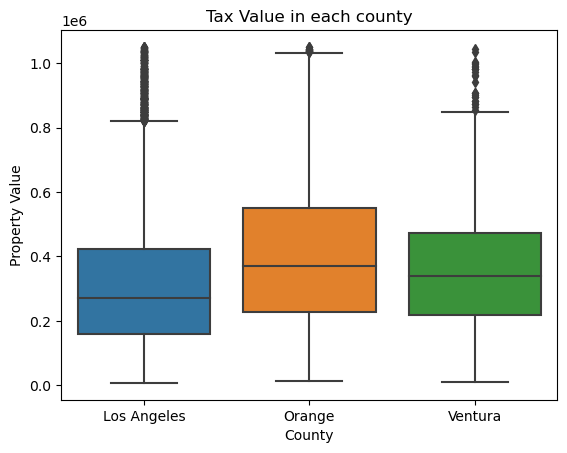

In [3]:
# visualization of property value in each fips code by box plot
f.fips_plot('fips','tax_value', train)

In [4]:
# ANOVA stats test to determine if the two variables are related.
f.anova_test(train, 'fips')

We fail to reject the null.


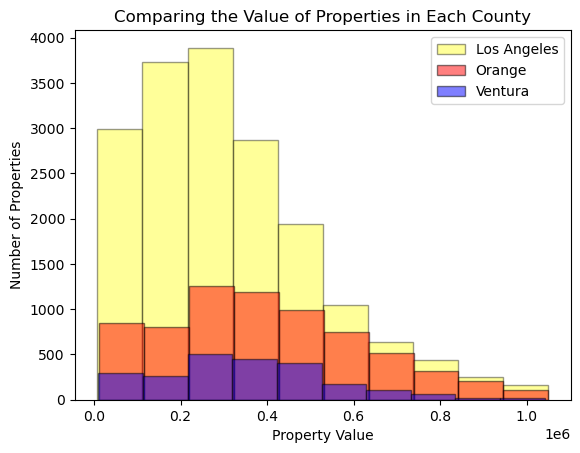

In [6]:
# visualizing the number of properties in each county based on property value
f.county_plot(train)

### Takeaways:
- The stats test rejects the null therefore the property value and FIPS code are related.
- In this graph we can see that Orange County and Los Angeles County have more properties that are much more expensive than Ventura County.

## Does the number of bed/baths affect the property value?

**Ho: The number of bedrooms and property value are indpendent of each other.**  
**Ha: The number of bedrooms and property value are related.**

- determine if the property value and bedrooms are related
- confidence interval of 95%
- alpha of .05

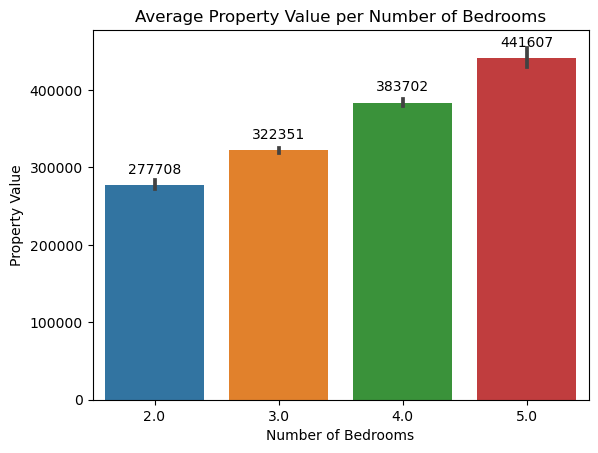

In [7]:
# visualizing the average property value based on number of bedrooms
f.beds_plot(train)

In [8]:
# testing for a relationship between number of bedrooms and property value
f.anova_test(train, 'bed')

We fail to reject the null.


### Takeways:
- The stats test proves that there is a relationship between number of bedrooms and property value.

**Ho: The number of bathrooms and property value are indpendent of each other.**  
**Ha: The number of bathrooms and property value are related.**

- determine if the property value and bathrooms are related
- confidence interval of 95%
- alpha of .05

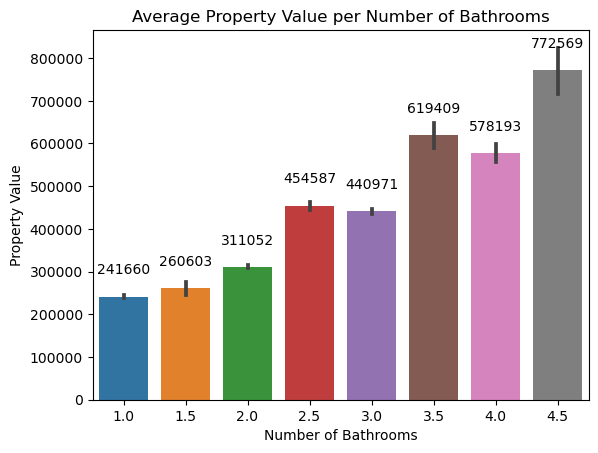

In [9]:
# visualization of the average property value compared to number of bathrooms
f.baths_plot(train)

From the graph we can see that the more bathrooms there are the more expensive the property value is.

In [10]:
# testing for the correlation between tax_value and number of bathrooms
f.testing_corr(train, 'bath')

The correlation between bath and property value is: 0.377
--------------------------------------------------------
We reject the null.


### Takeaways:
- The stats test proves there is a correlation between number of bathrooms and property value.

## Does the year the property was built affect the value?

**Ho: The year the property was built and the property value is independent of each other.**  
**Ha: The year built and the property value are related.**

- determine if the property value and year built are related
- confidence interval of 95%
- alpha of .05

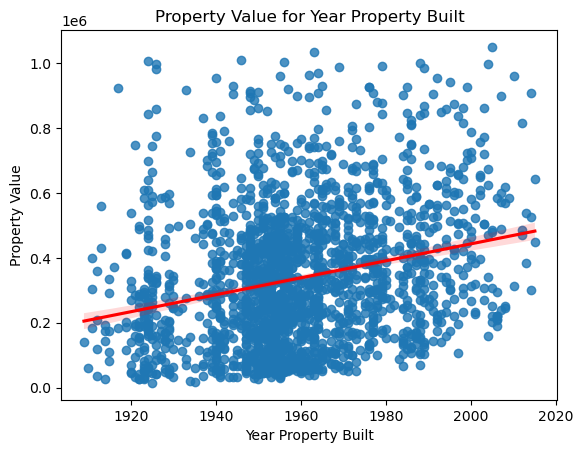

In [11]:
# visualization of the comparison of year built and property value
f.year_built_plot(train)

In [12]:
# testing correlation between year built and property value
f.testing_corr(train, 'year')

The correlation between year and property value is: 0.264
--------------------------------------------------------
We reject the null.


### Takeaways:
- From the graph and the stats test we can see there is a relationship between the year built and the property value.

## Does the lot size affect property value?

**Ho: The size of the lot and the property value is independent of each other.**  
**Ha: The lot size and the property value are related.**

- determine if the property value and lot size are related
- confidence interval of 95%
- alpha of .05

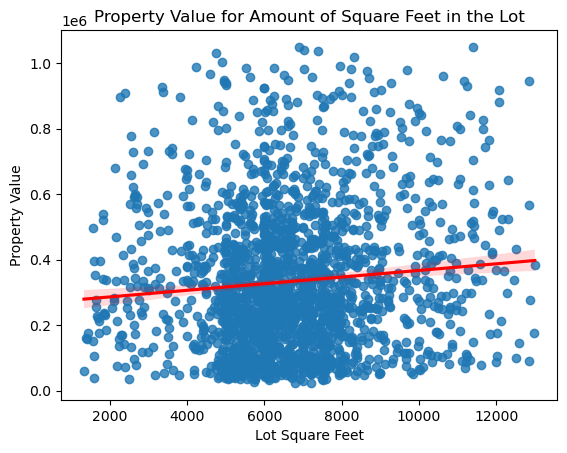

In [13]:
# visualization of the comparison of lot_sqft and property value
f.lot_sqft_plot(train)

In [14]:
# testing for a correlation between lot_sqft and property value
f.testing_corr(train, 'lot_sqft')

The correlation between lot_sqft and property value is: 0.070
--------------------------------------------------------
We reject the null.


### Takeaways:
- There is a very small correlation between lot_sqft and tax value however it is there.

**Ho: The square feet of the property and the property value is independent of each other.**  
**Ha: The square feet and the property value are related.**

- determine if the property value and square feet are related
- confidence interval of 95%
- alpha of .05

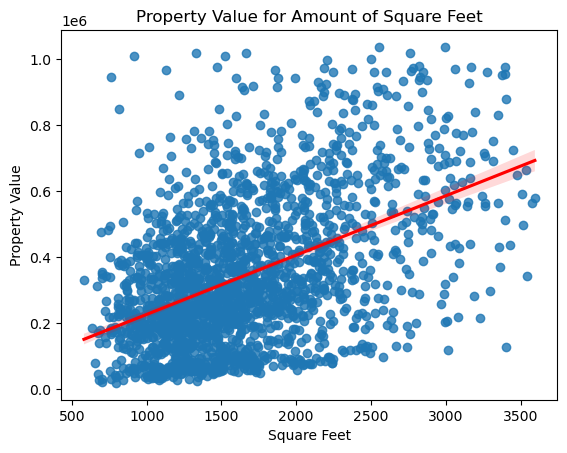

In [15]:
# visualization of the comparison between square feet and property value
f.sqft_plot(train)

In [16]:
# testing for a correlation between sqft and property value
f.testing_corr(train, 'sqft')

The correlation between sqft and property value is: 0.457
--------------------------------------------------------
We reject the null.


### Takeaways:
- There is a clear correlation between sqft and property value from both the graph and stats test.

## Exploration Summary
- The FIPS code proved to be a driver of property value. Properties in Orange County, on average are more expensive then those in Los Angeles or Ventura County.
- The number of bedrooms and bathrooms is a driver of property value. As the number of bedrooms and bathrooms increase so does the property value.
- The year the property was built is also a driver of property value. On average, the newer the property, the more expensive it is.
- The lot size and square feet are driver of property value. The greater the size of lot and size of property, the more the property is valued.

## Features I'm moving to modeling with
- FIPS code (driver of property value)
- Number of bedrooms (driver of property value)
- Number of bathrooms (driver of property value)
- Sqft (driver of property value)

## Features I'm not moving to modeling with
- Year built (year is not a continuous variable and there are too many to create dummies with)
- Lot size (there is not enough of a correlation to property value to keep it in modeling)

## Modeling
- I will be using RMSE as the evaluation metric
- The baseline RMSE is about 215000.

In [17]:
# splitting data again and dropping columns not modeling with
X_train, y_train, X_val, y_val, X_test, y_test = f.prep_zillow(zillow)

In [18]:
# creating prediction table
preds, baseline_rmse = f.preds_table(y_train)

The RMSE for the baseline is: 213586.65


In [19]:
# running LogisticRegression model
preds, lm_rmse = f.lr_testing(X_train, y_train, preds)

The RMSE for the Linear Regression Model on the train data set is: 187463.34


In [20]:
# running LassoLars model
preds, lasso_rmse = f.lasso_testing(X_train, y_train, preds)

The RMSE for the Lasso Lars Model on the train data set is: 187444.71


In [21]:
# running PolynomialFeatures for LogisticRegression model
preds, poly_rmse = f.poly_testing(X_train, y_train, preds)

The RMSE for the Polynomial Linear Regression Model on the train data set is: 186899.04


In [22]:
# running PolynomialFeatures for LassoLars model
preds, lassopoly_rmse = f.lasso_poly_testing(X_train, y_train, preds)

The RMSE for the Polynomial Lasso Lars Model on the train data set is: 186922.00


In [23]:
# running Tweedie Regressor model
preds, tweedie_rmse = f.tweedie_norm_testing(X_train, y_train, preds)

The RMSE for the Tweedie Regressor Model on the train data set is: 206851.46


In [24]:
# creating rmse data frame
rmse_df = f.models_rmse(baseline_rmse, lm_rmse, lasso_rmse, poly_rmse, lassopoly_rmse, tweedie_rmse)
rmse_df

,model,rmse
0,baseline,213586.648090
1,linear,187463.337136
2,lasso,187444.706721
3,linear_poly,186899.043395
4,lasso_poly,186922.003381
5,tweedie_norm,206851.455047


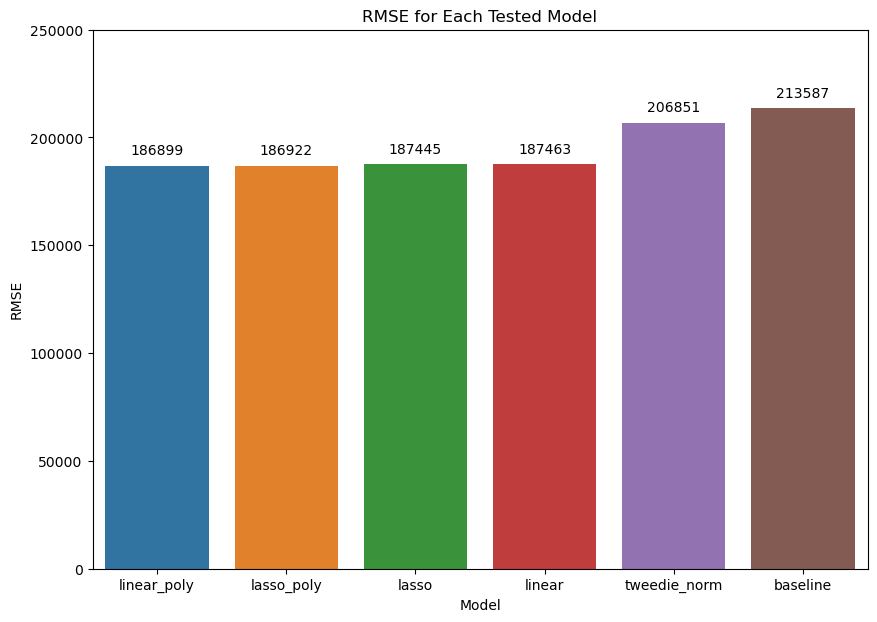

In [25]:
# creating visualization of models' rmse
f.model_plot(rmse_df)

## Takeaways:
- From this graph I chose to move forward with Polynomial Linear Regression, Polynomial Lasso Lars and Lasso Lars

In [26]:
# creating validate predictions table
val_preds = f.val_preds(y_train, y_val)

In [27]:
# running Polynomial Linear Regression
val_preds, poly_rmse = f.val_poly_test(X_train, y_train, X_val, y_val, val_preds)

The RMSE for the Polynomial Linear Regression Model on the validate data set is: 189016.54


In [28]:
# running Lasso Lars model
val_preds, lasso_rmse = f.val_lasso_test(X_train, y_train, X_val, y_val, val_preds)

The RMSE for the Lasso Lars Model on the validate data set is: 189261.32


In [29]:
# running Polynomial Lasso Lars model
val_preds, lassopoly_rmse = f.val_lassopoly_test(X_train, y_train, X_val, y_val, val_preds)

The RMSE for the Polynomial Lasso Lars Model on the validate data set is: 189000.61


In [30]:
# creating rmse table for validate models
val_rmse_df = f.val_models_rmse(baseline_rmse, lasso_rmse, poly_rmse, lassopoly_rmse)
val_rmse_df

,model,rmse
0,baseline,213586.648090
1,lasso,189261.316299
2,linear_poly,189016.541346
3,lasso_poly,189000.608095


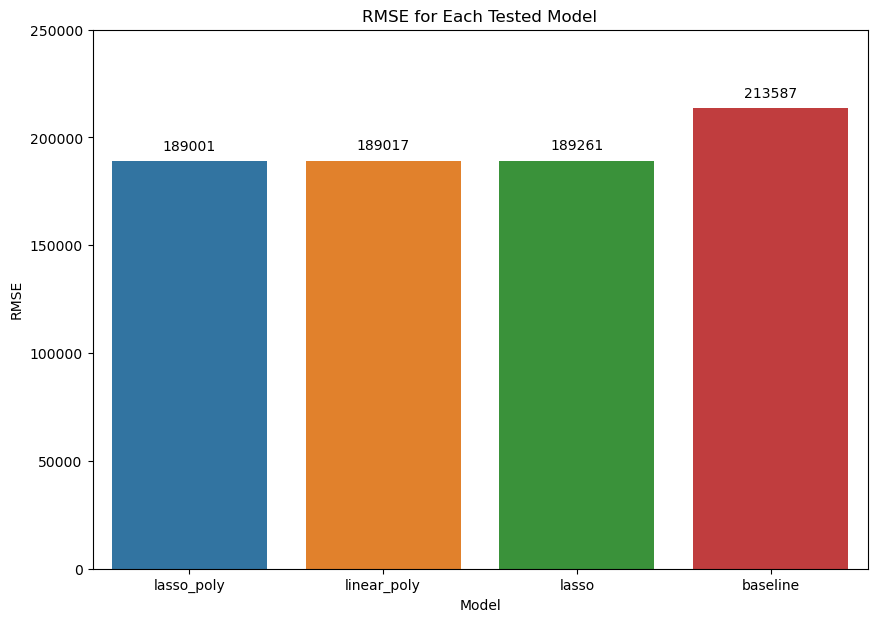

In [31]:
f.model_plot(val_rmse_df)

## Comparing models
- All three model out performed the baseline
- The model that did the best was the Polynomial Lasso Lars
- I have chosen to move forward with the Polynomial Lasso Lars

In [32]:
f.test_poly(X_train, y_train, X_test, y_test)

The RMSE for the Polynomial Lasso Lars Model on the test dataset is: 186486.63


## The final model had an RMSE of 186,486

## Modeling Summary
- All my models out performed the baseline.
- The best three models were Polynomial Lasso Lars, Polynomial Linear Regression and Lasso Lars

# Conclusions

## Exploration

- The FIPS code proved to be a driver of property value. Properties in Orange County, on average are more expensive then those in Los Angeles or Ventura County.
- The number of bedrooms and bathrooms is a driver of property value. As the number of bedrooms and bathrooms increase so does the property value.
- The year the property was built is also a driver of property value. On average, the newer the property, the more expensive it is.
- The lot size and square feet are driver of property value. The greater the size of lot and size of property, the more the property is valued.

## Modeling
### My final model had an RMSE of 186,486
- I believe my model will out perform the baseline

## Recommendations
- Lot size proved to be an ineffective method of estimating property value. 
- Sqft, number bedrooms and number of bathrooms all proved to be the more efficient in estimating property value.
- The FIPS code proved to be the most effective at helping estimate property value.

## Next Steps
- I would look into longitude and latitude. I would find out how that would effect my models ability to estimate property value.
- I would also look into building quality type and architecture type.